# read data to construct a network graph

In [6]:
import numpy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

datapath = r"C:\Users\CAN_LC\Desktop\Datacastle\networks\model3.csv"

df = pd.read_csv(datapath, header = None)
source = list(df[0])
target = list(df[1])

G = nx.empty_graph()

# print "source:\n",source
# print "target:\n",target

for i in range(len(source)):
    G.add_edge(source[i],target[i])
    
print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())
print nx.number_connected_components(G)

dcDict = nx.degree_centrality(G)

tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)

nodeList = []
for j in range(len(tempList)):
    temp = tempList[j][0]
    nodeList.append(temp)
    
# print nodeList

print "nodes have been sorted!"

# nx.draw(G,pos=nx.spring_layout(G))

# plt.show()

Network has 426485 nodes
Network has 8543321 edges
1
nodes have been sorted!


#  Calculate Robustness

done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done!
done

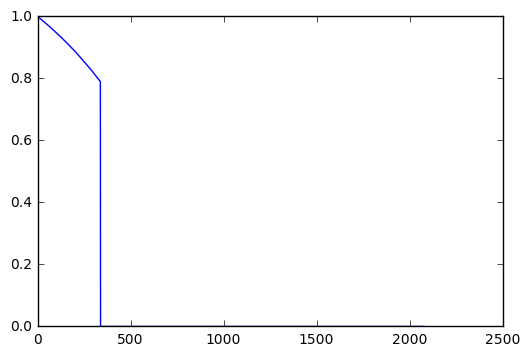

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# G = nx.watts_strogatz_graph(1000,4,0.1) 
# G = nx.barabasi_albert_graph(1000, 2)

# nodeList = G.nodes()

length = len(nodeList)

# print G.nodes()

ratioList = []

deleteSize = 500

for k in range(len(nodeList)/deleteSize-1):
    rList = nodeList[k*deleteSize:(k+1)*deleteSize]

    G.remove_nodes_from(rList)

    largest_cc = max(nx.connected_components(G))
    
    ratio = len(largest_cc)/float(length)
    
    ratioList.append(ratio)
    print "done!"
# print ratioList

R = sum(ratioList)/len(ratioList)
print "Robustness is:",R

plt.plot(ratioList)
# print G.nodes()

# print G.name
# print nx.is_connected(G)
# nx.draw(G,pos=nx.spring_layout(G))

plt.show()

#  Write node DATA to a csv file (OLD VERSION) discard tail row

In [13]:
import numpy
import time
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

#----------start to count time-------------------
beginTime =time.clock()

model = "1"
datapath = r"C:\Users\CAN_LC\Desktop\Datacastle\networks\%s.csv"%model
outpath = r"C:\Users\CAN_LC\Desktop\Datacastle\%s.csv"%model

df = pd.read_csv(datapath, header = None)
source = list(df[0])
target = list(df[1])

G = nx.empty_graph()

# print "source:\n",source
# print "target:\n",target

for i in range(len(source)):
    G.add_edge(source[i],target[i])
    
print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())

dcDict = nx.degree_centrality(G)

tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)

nodeList = []
for j in range(len(tempList)):
    temp = tempList[j][0]
    nodeList.append(temp)

nodeIDList = []
for k in range(1,501):
    tempID = "nodeID" + str(k)
    nodeIDList.append(tempID)
# print nodeIDList

nodeSeries = []
for n in range(1,501):
    tempSeries = []
    for m in range(len(nodeList)/500):
        tempSeries.append(nodeList[500*m + n])
    nodeSeries.append(tempSeries)

nodeData = dict(zip(nodeIDList,nodeSeries))

df = DataFrame(nodeData,columns=nodeIDList, index=[model]*(len(nodeList)/500))
# print df

df.to_csv(outpath)
print "done!"

#------------counting running time-----------------       
endTime = time.clock()
print('Running time: %s Seconds; %s Minutes'
            %(endTime-beginTime,(endTime-beginTime)/60))  

Network has 440 nodes
Network has 910 edges
done!
Running time: 0.205759151766 Seconds; 0.0034293191961 Minutes


#  Write FULL nodes DATA to a csv file  (NEW VERSION) (Degree Centrality)

In [ ]:
import numpy
import time
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import csv

#----------start to count time-------------------
beginTime =time.clock()

model = "real3"
datapath = r"C:\Users\CAN_LC\Desktop\Datacastle\networks\%s.csv"%model
outpath = r"C:\Users\CAN_LC\Desktop\Datacastle\%s.csv"%model
nodepath = r"C:\Users\CAN_LC\Desktop\Datacastle\%s_nodeList.csv"%model
csvfile = file(outpath,'wb')
nodefile = file(nodepath, 'wb')

df = pd.read_csv(datapath, header = None)
source = list(df[0])
target = list(df[1])

G = nx.empty_graph()

# print "source:\n",source
# print "target:\n",target

for i in range(len(source)):
    G.add_edge(source[i],target[i])
    
print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())

dcDict = nx.degree_centrality(G)

tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)

# get nodes
writer = csv.writer(nodefile)
nodeList = []
for j in range(len(tempList)):
    temp = tempList[j][0]
    writer.writerows([[temp]])
    nodeList.append(temp)
    
# label the nodes
nodeIDList = []
for k in range(1,501):
    tempID = "nodeID" + str(k)
    nodeIDList.append(tempID)
# print nodeIDList

writer = csv.writer(csvfile)
writer.writerow(['NetID'] + nodeIDList)

nodeSeries = []
deletesize = 500
for i in range(len(nodeList)/deletesize):
    tempSeries = nodeList[i*deletesize:(i+1)*deletesize]
    row = [[model] + tempSeries]
    nodeSeries += tempSeries
    writer.writerows(row) 
tail = list(set(nodeList)-set(nodeSeries))
# print tail
tailrow = [[model] + tail]
writer.writerows(tailrow) 
    
csvfile.close()
nodefile.close()
print 'done!'

# nodeSeries = []
# for n in range(1,501):
#     tempSeries = []
#     for m in range(len(nodeList)/500):
#         tempSeries.append(nodeList[500*m + n])
#     nodeSeries.append(tempSeries)

# nodeData = dict(zip(nodeIDList,nodeSeries))

# df = DataFrame(nodeData,columns=nodeIDList, index=[model]*(len(nodeList)/500))
# # print df

# df.to_csv(outpath)
# print "done!"

#------------counting running time-----------------       
endTime = time.clock()
print('Running time: %s Seconds; %s Minutes'
            %(endTime-beginTime,(endTime-beginTime)/60))  

# Write FULL nodes DATA to a csv file (NEW VERSION 2) (Left DC)

In [ ]:
import numpy
import time
import networkx as nx
import pandas as pd
from pandas import Series, DataFrame
import csv
#----------start to count time-------------------
beginTime =time.clock()

model = "real3"
datapath = r"C:\Users\CAN_LC\Desktop\Datacastle\networks\%s.csv"%model
outpath = r"C:\Users\CAN_LC\Desktop\Datacastle\%s.csv"%model
nodepath = r"C:\Users\CAN_LC\Desktop\Datacastle\%s_nodeList.csv"%model
sortedfile = file(outpath,'wb')
nodefile = file(nodepath, 'wb')
writer1 = csv.writer(nodefile)

df = pd.read_csv(datapath, header = None)
source = list(df[0])
target = list(df[1])

# Construct initial graph 
G = nx.empty_graph()
for i in range(len(source)):
    G.add_edge(source[i],target[i])
    
print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())

# # get nodes list
# dcDict = nx.degree_centrality(G)
# tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
# nodeList = []
# for j in range(len(tempList)):
#     temp = tempList[j][0]
#     writer1.writerows([[temp]])
#     nodeList.append(temp)

length = len(G)
deleteSize = 6
nodeList = []
for j in range(length/deleteSize):
    # centrality index
    dcDict = nx.degree_centrality(G)  # get nodes' degree centrality index 
    tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
    tempNodeList = []
    for j in range(len(tempList)):
        temp = tempList[j][0]
        tempNodeList.append(temp)
    
    rList = tempNodeList[:deleteSize] # delete the first 500 nodes in row
    G.remove_nodes_from(rList)
    nodeList += rList

for s in range(len(nodeList)):
    temp = nodeList[s]
    writer1.writerows([[temp]])

# label the nodes
nodeIDList = []
for k in range(1,501):
    tempID = "nodeID" + str(k)
    nodeIDList.append(tempID)
# print nodeIDList

writer2 = csv.writer(sortedfile)
writer2.writerow(['NetID'] + nodeIDList)

# write nodelist to csv file
nodeSeries = []
for j in range(len(nodeList)/deleteSize):
    tempSeries = nodeList[i*deleteSize:(i+1)*deleteSize]
    row = [[model] + tempSeries]
    nodeSeries += tempSeries
    writer2.writerows(row) 
tail = list(set(nodeList)-set(nodeSeries))
# print tail
tailrow = [[model] + tail]
writer2.writerows(tailrow) 
    
sortedfile.close()
nodefile.close()
print 'done!'

#------------counting running time-----------------       
endTime = time.clock()
print('Running time: %s Seconds; %s Minutes'
            %(endTime-beginTime,(endTime-beginTime)/60))  

Network has 426485 nodes
Network has 8543321 edges


#  Analysis of Model 3 Network

In [ ]:
import numpy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

datapath = r"C:\Users\CAN_LC\Desktop\Datacastle\networks\model4.csv"

df = pd.read_csv(datapath, header = None)
source = list(df[0])
target = list(df[1])

G = nx.empty_graph()

# print "source:\n",source
# print "target:\n",target

for i in range(len(source)):
    G.add_edge(source[i],target[i])
    
print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())

degree = nx.degree_histogram(G)
x = range(len(degree))
y = [z/float(sum(degree)) for z in degree]

plt.plot(x,y,'g-o')
plt.show()

# Calculating Network Robustness (FULL CODE Version1)

Network has 440 nodes
Network has 910 edges
False
Nodes have been sorted!
delete nodeset 0, done!
delete nodeset 1, done!
delete nodeset 2, done!
delete nodeset 3, done!
delete nodeset 4, done!
delete nodeset 5, done!
delete nodeset 6, done!
delete nodeset 7, done!
delete nodeset 8, done!
delete nodeset 9, done!
delete nodeset 10, done!
delete nodeset 11, done!
delete nodeset 12, done!
delete nodeset 13, done!
delete nodeset 14, done!
delete nodeset 15, done!
delete nodeset 16, done!
delete nodeset 17, done!
delete nodeset 18, done!
delete nodeset 19, done!
delete nodeset 20, done!
delete nodeset 21, done!
delete nodeset 22, done!
delete nodeset 23, done!
delete nodeset 24, done!
delete nodeset 25, done!
delete nodeset 26, done!
delete nodeset 27, done!
delete nodeset 28, done!
delete nodeset 29, done!
delete nodeset 30, done!
delete nodeset 31, done!
delete nodeset 32, done!
delete nodeset 33, done!
delete nodeset 34, done!
delete nodeset 35, done!
delete nodeset 36, done!
delete node

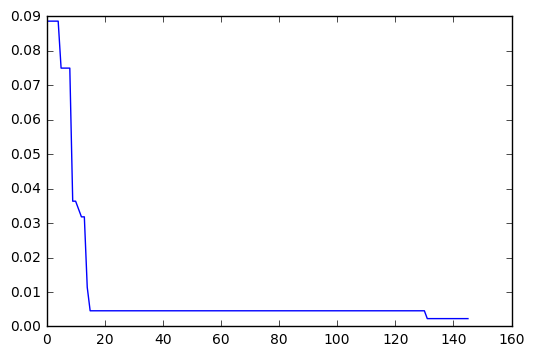

Running time: 0.170075438771 Seconds; 0.00283459064619 Minutes


In [12]:
# -*- coding: utf-8 -*-
import time
import numpy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
#----------start to count time-------------------
beginTime =time.clock()

datapath = r"C:\Users\CAN_LC\Desktop\Datacastle\networks\1.csv"

df = pd.read_csv(datapath, header = None)
source = list(df[0])
target = list(df[1])

# Construct initial graph 
G = nx.empty_graph()
for i in range(len(source)):
    G.add_edge(source[i],target[i])
    
print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())
print nx.is_connected(G)

# centrality index
dcDict = nx.degree_centrality(G)  # get nodes' degree centrality index 
# dcDict = nx.clustering(G)
# dcDict = nx.closeness_centrality(G)  # get nodes' closeness centrality index 
# dcDict = nx.betweenness_centrality(G)  # get nodes' betweenness centrality index 
# dcDict = nx.eigenvector_centrality(G)  # get nodes' eigenvector centrality index 
# dcDict = nx.katz_centrality(G)  # get nodes' katz centrality index 

# print dcDict

tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
# print tempList

nodeList = []
for j in range(len(tempList)):
    temp = tempList[j][0]
    nodeList.append(temp)
    
# print nodeList
print "Nodes have been sorted!"

length = len(nodeList)

# delete node process
ratioList = []
deleteSize = 3

for k in range(len(nodeList)/deleteSize):
    rList = nodeList[k*deleteSize:(k+1)*deleteSize] # delete 500 nodes in row
    G.remove_nodes_from(rList)
    largest_cc = max(nx.connected_components(G))  # get the maximum component size
    ratio = len(largest_cc)/float(length)
    ratioList.append(ratio)
    print "delete nodeset %s, done!"%k
# print ratioList

# calculate network robustness index
R = sum(ratioList)/len(ratioList)
print "Robustness is:",R

plt.plot(ratioList)
plt.show()

#------------counting running time-----------------       
endTime = time.clock()
print('Running time: %s Seconds; %s Minutes'%(endTime-beginTime,(endTime-beginTime)/60))  

# Calculating Network Robustness (FULL CODE Version2) (Left DC)

In [ ]:
# -*- coding: utf-8 -*-
import time
import numpy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
#----------start to count time-------------------
beginTime =time.clock()

datapath = r"C:\Users\CAN_LC\Desktop\Datacastle\networks\1.csv"

df = pd.read_csv(datapath, header = None)
source = list(df[0])
target = list(df[1])

# Construct initial graph 
G = nx.empty_graph()
for i in range(len(source)):
    G.add_edge(source[i],target[i])

print "Inital Network has %s nodes" % len(G.nodes())
print "Inital Network has %s edges" % len(G.edges())

length = len(G)
deleteSize = 3
# iterGraph = G
ratioList = []
for k in range(length/deleteSize):
    # centrality index
#     print "Network has %s nodes" % len(G.nodes())
#     print "Network has %s edges" % len(G.edges())
    dcDict = nx.degree_centrality(G)  # get nodes' degree centrality index 
    tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
    nodeList = []
    for j in range(len(tempList)):
        temp = tempList[j][0]
        nodeList.append(temp)
    
    rList = nodeList[:deleteSize] # delete the first 500 nodes in row
    G.remove_nodes_from(rList)
    
    largest_cc = max(nx.connected_components(G))    # get the maximum component size
    ratio = len(largest_cc)/float(length)
    ratioList.append(ratio)
    print "delete nodeset %s, done!"%k

# calculate network robustness index
R = sum(ratioList)/len(ratioList)
print "Robustness is:",R

plt.plot(ratioList)
plt.show()

#------------counting running time-----------------       
endTime = time.clock()
print('Running time: %s Seconds; %s Minutes'%(endTime-beginTime,(endTime-beginTime)/60))  